# ==========================================
# Loan Approval Prediction - Elevvo Pathways Internship
# Author: Syed Huzaifa Bin Khamis
# Level 2 - Task 4
# ==========================================

In [1]:
# ----- Step 1: Import Required Libraries -----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE

In [2]:
# ----- Step 2: Load Dataset -----
# Download from: https://www.kaggle.com/datasets/ninzaami/loan-predication
df = pd.read_csv("LoanApprovalPrediction.csv")  # Adjust filename if needed
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (614, 13)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

In [3]:
# ----- Step 3: Basic Info and Cleaning -----
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing numerical values with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter filling missing values:")
print(df.isnull().sum())


Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

After filling missing values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [4]:
# ----- Step 4: Encode Categorical Columns -----
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print("\nEncoded columns successfully!")


Encoded columns successfully!


In [5]:
# ----- Step 5: Feature Selection -----
# Assuming 'Loan_Status' is the target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [6]:
# ----- Step 6: Split Train/Test -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# ----- Step 7: Scaling -----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Class Distribution (Before SMOTE):
Loan_Status
1    337
0    154
Name: count, dtype: int64


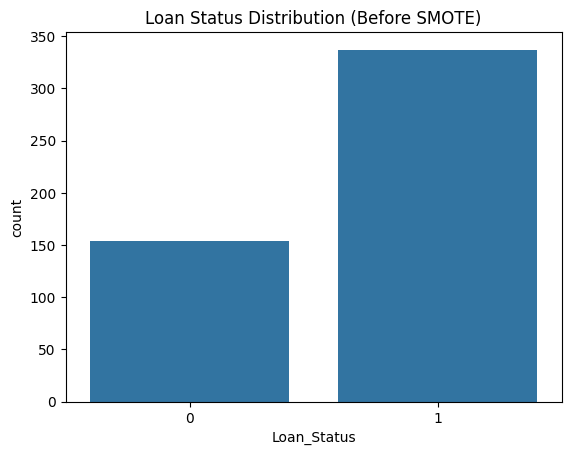

In [8]:
# ----- Step 8: Check Imbalance -----
print("\nClass Distribution (Before SMOTE):")
print(y_train.value_counts())

sns.countplot(x=y_train)
plt.title("Loan Status Distribution (Before SMOTE)")
plt.show()


Class Distribution (After SMOTE):
Loan_Status
1    337
0    337
Name: count, dtype: int64


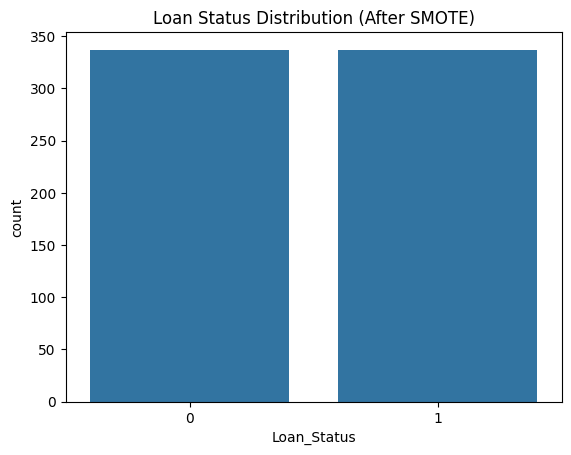

In [9]:
# ----- Step 9: Apply SMOTE (Bonus) -----
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("\nClass Distribution (After SMOTE):")
print(y_train_sm.value_counts())

sns.countplot(x=y_train_sm)
plt.title("Loan Status Distribution (After SMOTE)")
plt.show()

In [10]:
# ----- Step 10: Train Logistic Regression -----
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_sm, y_train_sm)
y_pred_lr = lr.predict(X_test)

In [11]:
# ----- Step 11: Train Decision Tree -----
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_sm, y_train_sm)
y_pred_dt = dt.predict(X_test)

In [12]:
# ----- Step 12: Evaluation Function -----
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n----- {model_name} Performance -----")
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


----- Logistic Regression Performance -----
Precision: 0.8387096774193549
Recall: 0.9176470588235294
F1 Score: 0.8764044943820225

Classification Report:
              precision    recall  f1-score   support

           0     0.7667    0.6053    0.6765        38
           1     0.8387    0.9176    0.8764        85

    accuracy                         0.8211       123
   macro avg     0.8027    0.7615    0.7764       123
weighted avg     0.8165    0.8211    0.8146       123



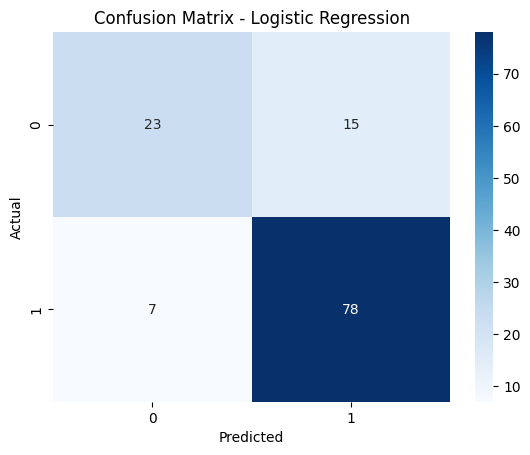


----- Decision Tree Performance -----
Precision: 0.8214285714285714
Recall: 0.8117647058823529
F1 Score: 0.8165680473372781

Classification Report:
              precision    recall  f1-score   support

           0     0.5897    0.6053    0.5974        38
           1     0.8214    0.8118    0.8166        85

    accuracy                         0.7480       123
   macro avg     0.7056    0.7085    0.7070       123
weighted avg     0.7499    0.7480    0.7489       123



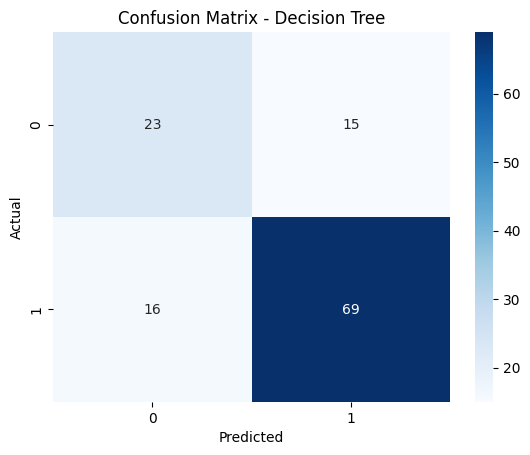

In [13]:
# ----- Step 13: Evaluate Both Models -----
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Summary Comparison:
                 Model  Precision    Recall  F1-Score
0  Logistic Regression   0.838710  0.917647  0.876404
1        Decision Tree   0.821429  0.811765  0.816568


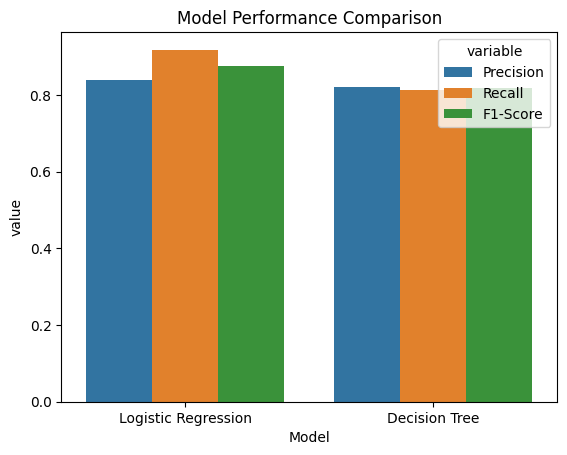

In [14]:
# ----- Step 14: Compare Results -----
print("\nSummary Comparison:")
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt)
    ]
})

print(results)
sns.barplot(data=results.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.show()